In [2]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Часть 1. О теореме Байеса

### Задача 1.

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

__Ответ__

По формуле Байеса:

$$P\Big(невиновен\ |\ редкая\ группа\ крови\Big) = 
\frac{P\Big(редкая\ группа\ крови\ |\ невиновен\Big) \cdot P\Big(невиновен\Big)}{P\Big(редкая\ группа\ крови\Big)}$$

Прокурор оценил вероятность встретить редкую группу группу, при условии что человек невиновен, а на самом деле должен был оценивать апостериорную вероятность в формуле выш, а уже на ее остновании делать вывод о $P(виновен\ |\ редкая\ группа\ крови)$.

<hr>

__Задача 2.__

Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

__Ответ__

Перепищем еще раз формула Байеса:

$$P\Big(виновен\ |\ редкая\ группа\ крови\Big) = 
\frac{P\Big(редкая\ группа\ крови\ |\ виновен\Big) \cdot P\Big(виновен\Big)}{P\Big(редкая\ группа\ крови\Big)}$$

$$P\Big(виновен\ |\ редкая\ группа\ крови\Big) = \frac{1 \cdot 10^{-6}}{ 10^{-2} } = 10^{-4}$$

На первый взгляд кажется, что адвокат действительно прав.<br>
Но вероятность, которую подсчитал он - это просто вероятость того, что **случайно взятый в городе человек с редкой группой крови** окажется виновен.

Адвокат не берет во внимание то, что этот подсудимый, скорее всего, не случайно взятый человек из целого города, у кого вдруг впоследствии оказалась редкая группа крови.<br>
Возможно, был какой-то круг подозреваемых (что снизило бы априорную вероятность того, что человек виновен с $10^{-6}$ до какого-то меньшего числа), и тогда, вероятность среди меньшего множества подозреваемых признать обвиняемого виновным была много выше, при условии его редкой группы крови.

<hr>

__Задача 3.__

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам - на чём лучше сосредоточиться?

In [4]:
p_ill = 0.01

def test_quality(fp=0.05, fn=0.05):
    """Probability of Patient is really ill when the test was positive"""
    p_full = p_ill * (1 - fn) + (1 - p_ill) * fp
    p_aposterior = p_ill * (1 - fn) / p_full
    return p_aposterior

In [5]:
# initial check:
test_quality(0.05, 0.05)

0.16101694915254236

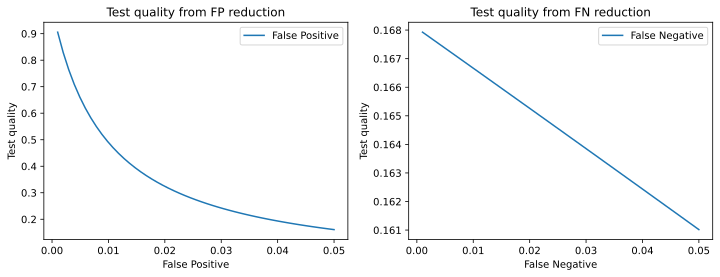

In [8]:
# test quality depends on FP and FN ranges
fn_grid = fp_grid = np.linspace(0.001, 0.05, num=51)


fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title("Test quality from FP reduction")
ax[0].plot(fp_grid, [test_quality(fp=i, fn=0.05) for i in fp_grid], label="False Positive")
ax[0].legend()
ax[0].set_xlabel("False Positive")
ax[0].set_ylabel("Test quality")

ax[1].set_title("Test quality from FN reduction")
ax[1].plot(fp_grid, [test_quality(fn=i) for i in fn_grid], label="False Negative")
ax[1].legend()
ax[1].set_xlabel("False Negative")
ax[1].set_ylabel("Test quality");

__Ответ__

Уменьшение ошибки False Positive значительно увеличивает качество теста (кратно), в отличие от уменьшения ошибки False Negative, которое увеличивает кажество теста лишь в сотых долях процента.

Вывод: при одинаковой стоимости уменьшения ошибки -> стоит сосредоточиться на False Positive 

<hr>

## Часть 2. О линейной регрессии

__Задача 1.__

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [9]:
DATASET_PATH = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
LOCATION = "Russia"
START_DATE = "2020-03-20"
TRAIN_PERIOD_DAYS = 50
TARGET_COLS = ["total_cases", "new_cases"]

In [10]:
df = pd.read_csv(
    DATASET_PATH,
    parse_dates=["date"],
    date_parser=lambda x: datetime.datetime.strptime(x, "%Y-%m-%d")
)

In [11]:
df_ru = df[
    (df.location == LOCATION) &\
    (df.date >= START_DATE)
].copy() \
    .sort_values(by="date") \
    .reset_index(drop=True)

In [12]:
# Все нули в new cases на единицы
df_ru["new_cases"] = np.clip(df_ru["new_cases"], a_min=1, a_max=None)

In [13]:
# Разделим на Train и Test
df_train, df_test = train_test_split(df_ru, train_size=TRAIN_PERIOD_DAYS, shuffle=False)

<hr>

__Задача 2.__

Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

a. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: ​y ~ exp(линейная функция от x),​где x — номер текущего дня.

b. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

c. Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

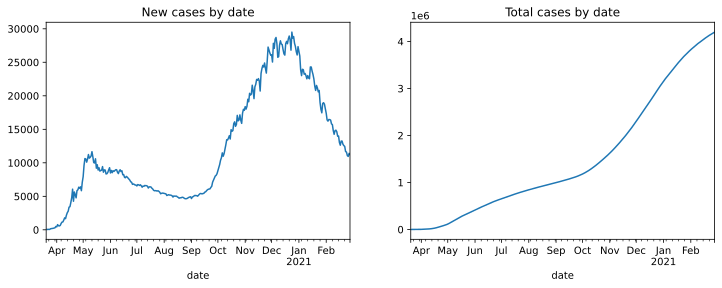

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df_ru.set_index("date")["new_cases"].plot(ax=ax[0], title="New cases by date")
df_ru.set_index("date")["total_cases"].plot(ax=ax[1], title="Total cases by date");

- Регрессия $y \sim \exp(x)$, или задачу можно переписать так: $\ln(y) = a + b \cdot x$

In [208]:
X = np.arange(TRAIN_PERIOD_DAYS)[:, np.newaxis]
y = df_train["new_cases"]
y_log = np.log(y)

In [45]:
model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X, y_log)
yhat_log = model_lr.predict(X)
yhat = np.exp(yhat_log)

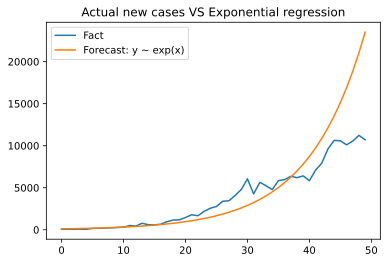

In [47]:
plt.title("Actual new cases VS Exponential regression")
plt.plot(X[:, 0], y, label="Fact")
plt.plot(X[:, 0], yhat, label="Forecast: y ~ exp(x)")
plt.legend();

- Апостериорное распределение параметров модели

In [60]:
# Выборочная дисперсия ошибки
sigma_noise = (y_log - yhat_log).pow(2).mean() ** 0.5
sigma_noise

0.44933847138019484

In [127]:
def bayesian_update(mu, sigma, x, y, sigma_noise):
    x = np.array([[1, x]])
    sigma_n = np.linalg.inv(
        np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(x.T, x)
    )
    mu_n = np.matmul(
        sigma_n,
        np.matmul(np.linalg.inv(sigma), mu.T) + \
            (1 / (sigma_noise ** 2)) * np.matmul(x.T, [y])
    )
    return mu_n, sigma_n

In [128]:
# init:
mu = np.array([0, 0])
sigma = 2 * np.identity(2)

# update:
for i in range(TRAIN_PERIOD_DAYS):
    x_i = X[i, 0]
    y_i = y[i]
    y_i_log = np.log(y_i)
    mu, sigma = bayesian_update(mu, sigma, x_i, y_i_log, sigma_noise)

- Sampling экспонент

In [289]:
def make_sampling(mu, sigma, X, n_samples=100):
    W = np.random.multivariate_normal(mu, sigma, size=n_samples)
    result = np.zeros((n_samples, X.shape[0]))
    # return result
    for i, w in enumerate(W):
        result[i, :] = (w[0] + w[1] * X).reshape(result.shape[1])
    return result

In [303]:
def forecast(mu, sigma, x, n_samples=100):
    yhat_log_sampling = make_sampling(mu, sigma, x, n_samples)
    yhat_sampling = np.exp(yhat_log_sampling)
    yhat = yhat_sampling.mean(axis=0)
    return yhat

- Предсказание числа новых случаев за выбранные даты + визуализация предсказаний за остальные даты

In [304]:
print("Предсказания за некоторые даты:\n")
DATE_SEQ = ["2020-05-01", "2020-06-01", "2020-09-01"]

for date_i in DATE_SEQ:
    x_i = df_ru[df_ru.date == date_i].index[0]
    y_i = df_ru.loc[x_i]["new_cases"]

    yhat = forecast(mu, sigma, np.array([x_i])[:, np.newaxis], n_samples=1000)
    
    print(f"Date: {date_i} \tForecast: {int(yhat):,d} vs Fact: {int(y_i):,d}")

Предсказания за некоторые даты:

Date: 2020-05-01 	Forecast: 11,034 vs Fact: 7,933
Date: 2020-06-01 	Forecast: 348,667 vs Fact: 8,485
Date: 2020-09-01 	Forecast: 11,398,116,755 vs Fact: 4,670


In [324]:
# построим для примера группу экспонент, например, до 2020-05-01
df_ru["period"] = df_ru.index.to_numpy()

- Визуализируем несколько экспонент

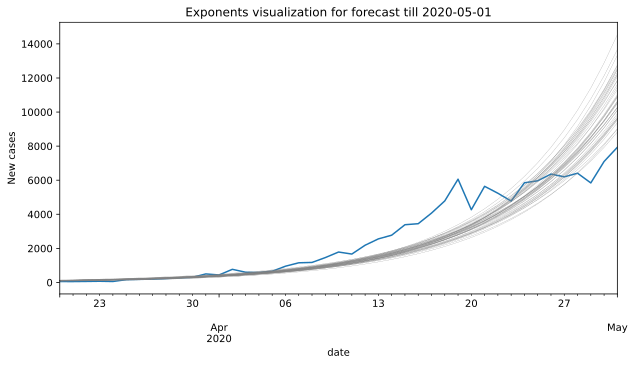

In [346]:
forecast_till = "2020-05-01"

X = df_ru[df_ru.date <= forecast_till][["period"]].values
y = df_ru[df_ru.date <= forecast_till]["new_cases"]
yhat_log_sampling = make_sampling(mu, sigma, X, n_samples=50)

plt.figure(figsize=(10, 5))

df_ru[df_ru.date <= forecast_till].set_index("date")["new_cases"].plot(
    label="fact", title=f'Exponents visualization for forecast till {forecast_till}'
)
for i in range(len(y)):
    yhat_log_i = yhat_log_sampling[i, :]
    yhat_i = np.exp(yhat_log_i)
    
    df_ru[df_ru.date <= forecast_till].assign(yhat_i = yhat_i) \
        .set_index("date").yhat_i \
        .plot(linewidth=0.2, color='gray')
    
plt.ylabel("New cases");

- усредненный прогноз до сентября 2020-го года

In [310]:
# forecast for other days:
yhat = forecast(
    mu, sigma,
    df_ru.assign(period = lambda x: x.index)[["period"]].values,
    n_samples=1000
)

df_ru["forecast"] = yhat

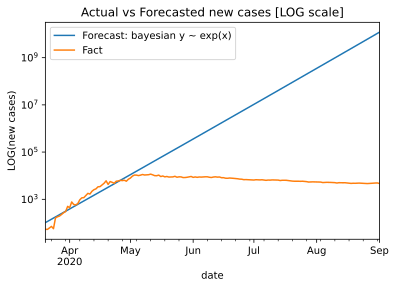

In [321]:
df_ru.set_index("date")[:"2020-09-01"].forecast.plot(
    label="Forecast: bayesian y ~ exp(x)", logy=True, title="Actual vs Forecasted new cases [LOG scale]"
)
df_ru.set_index("date")[:"2020-09-01"]["new_cases"].plot(label="Fact", logy=True)
plt.ylabel("LOG(new cases)")
plt.legend();

__Вывод__

- Пока рост был действительно экспоненциальный - экспоненциальная модель довольно неплохо предсказывала траекторию роста заболеваемости
- Но экспоненциальный рост в реальности прекращается. В итоге, на отдаленных от начальной точки датах мы получаем неадекватно высокие значения

<hr>

__Задача 3.__

Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана
<img src="./gaussian.png">


Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от *t*

a. Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

b. Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

c. Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

- a. Вместо классической Гауссианы будем обучать модель и будем предсказывать new_cases:

$$\log(y) \sim w_{0} + w_{1} \cdot x + w_{2} \cdot x^2$$

In [384]:
X = df_ru[['date', 'new_cases']].copy().assign(
    const = 1,
    x = lambda x: (x.date - datetime.datetime.strptime(START_DATE, "%Y-%m-%d")).dt.days
).assign(
    x_2 = lambda x: x.x ** 2
).set_index("date")

y = X.pop("new_cases")
y_log = np.log(y)

# Train / Test
X_train, X_test, y_train, y_test, y_log_train, y_log_test = train_test_split(
    X, y, y_log, train_size=50, shuffle=False
)

In [408]:
model_lr = LinearRegression(fit_intercept=False)
model_lr.fit(X_train, y_log_train)

# предсказания на трейне
yhat_log_train = pd.Series(model_lr.predict(X_train), index=y_train.index)
yhat_train = np.exp(yhat_log_train)

# предсказания на тесте до 1 сентября
yhat_log_test = pd.Series(model_lr.predict(X_test[:"2020-09-01"]), index=y_test[:"2020-09-01"].index)
yhat_test = np.exp(yhat_log_test)

In [412]:
# Полученные коэффициенты
model_lr.coef_

array([ 3.79130808e+00,  2.19495719e-01, -2.23063238e-03])

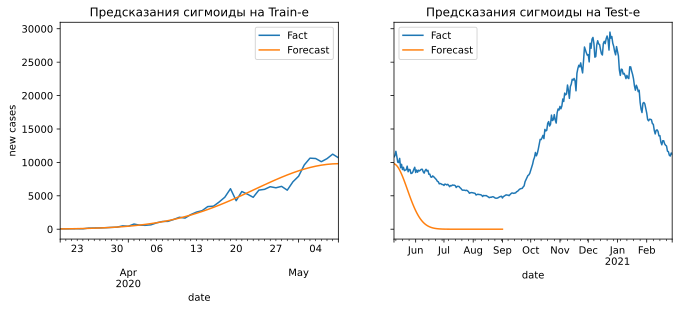

In [472]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4), sharey=True)

y_train.plot(title="Предсказания сигмоиды на Train-е", label="Fact", ax=ax[0])
yhat_train.plot(label="Forecast", ax=ax[0])
ax[0].legend()
ax[0].set_ylabel("new cases")

y_test.plot(title="Предсказания сигмоиды на Test-е", label="Fact", ax=ax[1])
yhat_test.plot(label="Forecast", ax=ax[1])
ax[1].legend()
ax[1].set_ylabel("new cases");

- b. Апостериорное распределение параметров модели

In [414]:
# Выборочная дисперсия ошибки
sigma_noise = (y_log_train - yhat_log_train).pow(2).mean() ** 0.5
sigma_noise # в новой модели на Train-е ошибка значительно меньше

0.17170440842149598

In [420]:
def bayesian_update(mu, sigma, x, y, sigma_noise):
    sigma_n = np.linalg.inv(
        np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(x.T, x)
    )
    mu_n = np.matmul(
        sigma_n,
        np.matmul(np.linalg.inv(sigma), mu.T) + \
            (1 / (sigma_noise ** 2)) * np.matmul(x.T, [y])
    )
    return mu_n, sigma_n

In [421]:
# init:
mu = np.array([0, 0, 0])
sigma = 2 * np.identity(3)

# update:
for i in range(TRAIN_PERIOD_DAYS):
    x_i = X_train.iloc[[i]].values
    y_i_log = y_log_train.iloc[i]
    mu, sigma = bayesian_update(mu, sigma, x_i, y_i_log, sigma_noise)

- Sampling экспонент

In [503]:
def make_sampling(mu, sigma, X, n_samples=100):
    W = np.random.multivariate_normal(mu, sigma, size=n_samples)
    result = np.zeros((n_samples, X.shape[0]))
    for i, w in enumerate(W):
        result[i, :] = X.dot(w)
    return result

In [504]:
def forecast(mu, sigma, x, n_samples=100):
    yhat_log_sampling = make_sampling(mu, sigma, x, n_samples)
    yhat_sampling = np.cumsum(np.exp(yhat_log_sampling), axis=1)
    yhat = yhat_sampling.mean(axis=0)
    return yhat

- Предсказание числа новых случаев за выбранные даты + визуализация предсказаний за остальные даты

__Total cases__

In [511]:
yhat_total = pd.Series(
    forecast(mu, sigma, X, n_samples=1000),
    index = X.index
)

print("Предсказания Total_Cases за некоторые даты:\n")
DATE_SEQ = ["2020-05-01", "2020-06-01", "2020-09-01"]

for date_i in DATE_SEQ:
    total_cases_i = df_ru.set_index("date").loc[date_i].get("total_cases")
    yhat_total_i = yhat_total.loc[date_i]
    print(f"Date: {date_i} \tForecast: {int(yhat_total_i):,d} vs Fact: {int(total_cases_i):,d}")

Предсказания Total_Cases за некоторые даты:

Date: 2020-05-01 	Forecast: 120,415 vs Fact: 114,431
Date: 2020-06-01 	Forecast: 349,217 vs Fact: 414,328
Date: 2020-09-01 	Forecast: 369,553 vs Fact: 997,072


- Визуализируем несколько сигмоид

In [537]:
yhat_total = np.cumsum(
    np.exp(make_sampling(mu, sigma, X, n_samples=1000)),
    axis=1
)
yhat_total = pd.DataFrame(yhat_total.T, index=X.index)
yhat_total_lower = yhat_total.quantile(q=0.1, axis=1)
yhat_total_upper = yhat_total.quantile(q=0.9, axis=1)

y_total = np.cumsum(y)

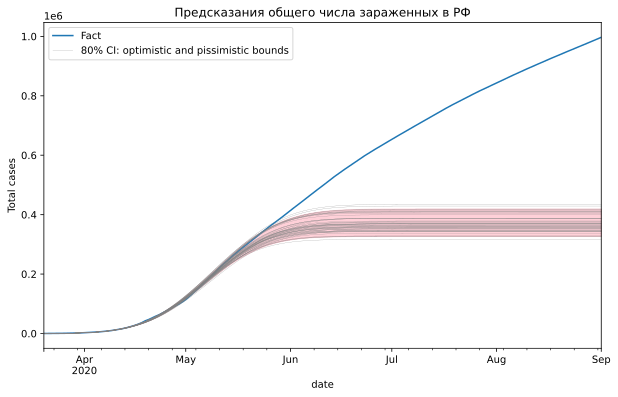

In [569]:
forecast_till = "2020-09-01"

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

y_total[:forecast_till].plot(ax=ax, title="Предсказания общего числа зараженных в РФ", label="Fact")
ax.fill_between(
    yhat_total_lower[:forecast_till].index,
    y1=yhat_total_lower[:forecast_till],
    y2=yhat_total_upper[:forecast_till],
    color='pink',
    alpha=0.75,
    label="80% CI: optimistic and pissimistic bounds"
)
ax.legend()

for i in np.arange(0, 1000, 20):
    yhat_total.loc[:forecast_till, i].plot(color='gray', ax=ax, linewidth=0.2)

ax.set_ylabel("Total cases");

__Вывод__

- Сигмоида позволяет учесть тот факт, что экспоненциальный рост не может продожаться бесконечно долго, выводит предсказания общего числа зараженных на плато
- Однако есть множество экзогенных факторов (частичное снятие ограничений, больший процент тестируемых и тд), повлиявших на появление новой экспоненты в отношении роста числа заболевших. Наша наивная модель, основанная на исторических данных, конечно же, не учитывает эттого

<hr>

__Задача 4.__

*Бонус:* проведите такой же анализ для других стран (здесь придётся руками подобрать дни начала моделирования — коронавирус приходил в разные страны в разное время). Насколько разные параметры получаются? Можно ли разделить страны на кластеры (хотя бы чисто визуально) в зависимости от этих параметров?

__Задача 5.__

[*Эта часть задания не оценивается, здесь нет правильных и неправильных ответов, но буду рад узнать, что вы думаете*]

Что вы поняли из этого упражнения? Что можно сказать про коронавирус по итогам такого моделирования? Как принять решение, например, о том, нужно ли вводить карантин?
